<a href="https://colab.research.google.com/github/ethicalPap/GW_ML_Code/blob/main/ML_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Imports

In [ ]:
""" pip commands For Google Collab Only"""

# # upgrade pip and imports
# !pip install --upgrade pip
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import os
import seaborn as sns # heatmap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
"""for collab dev purposes only"""

# pwd = os.chdir('/content/drive/MyDrive/GW_ML_Examples/Binary Classification Basic/')

'for collab dev purposes only'

## Load Dataset

In [133]:
# Read Dataset and view first few rows

df = pd.read_csv("C:/Users/papv2/source/GW_ML_EXAMPLES_WORK/loan_data.csv", delimiter=",")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Analyze Dataset

In [134]:
# check for null data; --> if null values exist, drop or fix
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [135]:
# print shape of the dataset
df.shape

(45000, 14)

In [136]:
# numerical feature statistics
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [137]:
# print column names, dtype, and non-null count. We will use dtype to select categorical and numerical columns later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Seperate Columns by Dtype Groupings

In [138]:
# grab categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")


Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


## Encode Categorical Columns

In [139]:
"""We need to encode the categorical features, to run a correlation and variance analysis"""

# first, copy df (save over df later)
encoded_data = df.copy()

# bin class
encoded_data['person_gender_encoded'] = encoded_data['person_gender'].map({'female': 0, 'male': 1})
print("Created 'person_gender_encoded' (0=female, 1=male)")

encoded_data['previous_defaults_encoded'] = encoded_data['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})
print("Created 'previous_defaults_encoded' (0=No, 1=Yes)")

# multi class
education_dummies = pd.get_dummies(encoded_data['person_education'], prefix='education')
encoded_data = pd.concat([encoded_data, education_dummies], axis=1)
print(f"Created {list(education_dummies.columns)} for education levels")

ownership_dummies = pd.get_dummies(encoded_data['person_home_ownership'], prefix='ownership')
encoded_data = pd.concat([encoded_data, ownership_dummies], axis=1)
print(f"Created {list(ownership_dummies.columns)} for home ownership")

intent_dummies = pd.get_dummies(encoded_data['loan_intent'], prefix='intent')
encoded_data = pd.concat([encoded_data, intent_dummies], axis=1)
print(f"Created {list(intent_dummies.columns)} for loan intent")


Created 'person_gender_encoded' (0=female, 1=male)
Created 'previous_defaults_encoded' (0=No, 1=Yes)
Created ['education_Associate', 'education_Bachelor', 'education_Doctorate', 'education_High School', 'education_Master'] for education levels
Created ['ownership_MORTGAGE', 'ownership_OTHER', 'ownership_OWN', 'ownership_RENT'] for home ownership
Created ['intent_DEBTCONSOLIDATION', 'intent_EDUCATION', 'intent_HOMEIMPROVEMENT', 'intent_MEDICAL', 'intent_PERSONAL', 'intent_VENTURE'] for loan intent


In [140]:
# drop original categorical data since we encoded them. Addl merge encoded with df

encoded_data = encoded_data.drop(columns=categorical_columns)
df = encoded_data

In [141]:
# display new dataset with encoded columns (int, float, bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  45000 non-null  float64
 1   person_income               45000 non-null  float64
 2   person_emp_exp              45000 non-null  int64  
 3   loan_amnt                   45000 non-null  float64
 4   loan_int_rate               45000 non-null  float64
 5   loan_percent_income         45000 non-null  float64
 6   cb_person_cred_hist_length  45000 non-null  float64
 7   credit_score                45000 non-null  int64  
 8   loan_status                 45000 non-null  int64  
 9   person_gender_encoded       45000 non-null  int64  
 10  previous_defaults_encoded   45000 non-null  int64  
 11  education_Associate         45000 non-null  bool   
 12  education_Bachelor          45000 non-null  bool   
 13  education_Doctorate         450

## Assign labels X and y

In [142]:
# Separate target label (y) and features (X)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## Correlation Analysis

    Drop any features that are not needed

In [143]:
# Feature Correlation
df.corr()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_encoded,...,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476,0.017528,...,0.039221,-0.007321,-0.003848,-0.035974,-0.004285,-0.082782,0.068081,0.016351,0.026834,-0.006695
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808,0.010173,...,0.220666,0.007086,-0.039185,-0.198627,0.001562,-0.016048,0.037863,-0.041573,0.015143,0.012847
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481,0.015078,...,0.035252,-0.004535,0.000490,-0.034499,-0.007188,-0.072846,0.058164,0.016102,0.026863,-0.006156
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714,0.010647,...,0.149924,0.013738,-0.025290,-0.136521,-0.002396,-0.006062,0.045657,-0.034140,0.001476,0.005500
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005,0.003662,...,-0.125839,0.017592,-0.015953,0.130044,0.004380,-0.017332,0.022505,0.012609,-0.004051,-0.013177
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880,-0.000367,...,-0.155019,0.011520,0.052900,0.125282,-0.001530,-0.001033,-0.015604,0.020547,-0.007713,0.001601
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851,0.011999,...,0.029443,-0.006692,-0.000855,-0.027891,-0.006147,-0.070653,0.054821,0.013298,0.027952,-0.004942
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647,-0.000223,...,0.007087,-0.004865,-0.002891,-0.005051,-0.009092,-0.015508,0.010228,0.003359,0.003795,0.009705
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000,-0.000561,...,-0.213451,0.013645,-0.093666,0.255239,0.084130,-0.064006,0.033838,0.065195,-0.022488,-0.085992
person_gender_encoded,0.017528,0.010173,0.015078,0.010647,0.003662,-0.000367,0.011999,-0.000223,-0.000561,1.000000,...,0.000696,0.002118,0.001802,-0.001794,0.003644,0.002369,0.000388,-0.006344,-0.001300,0.001502


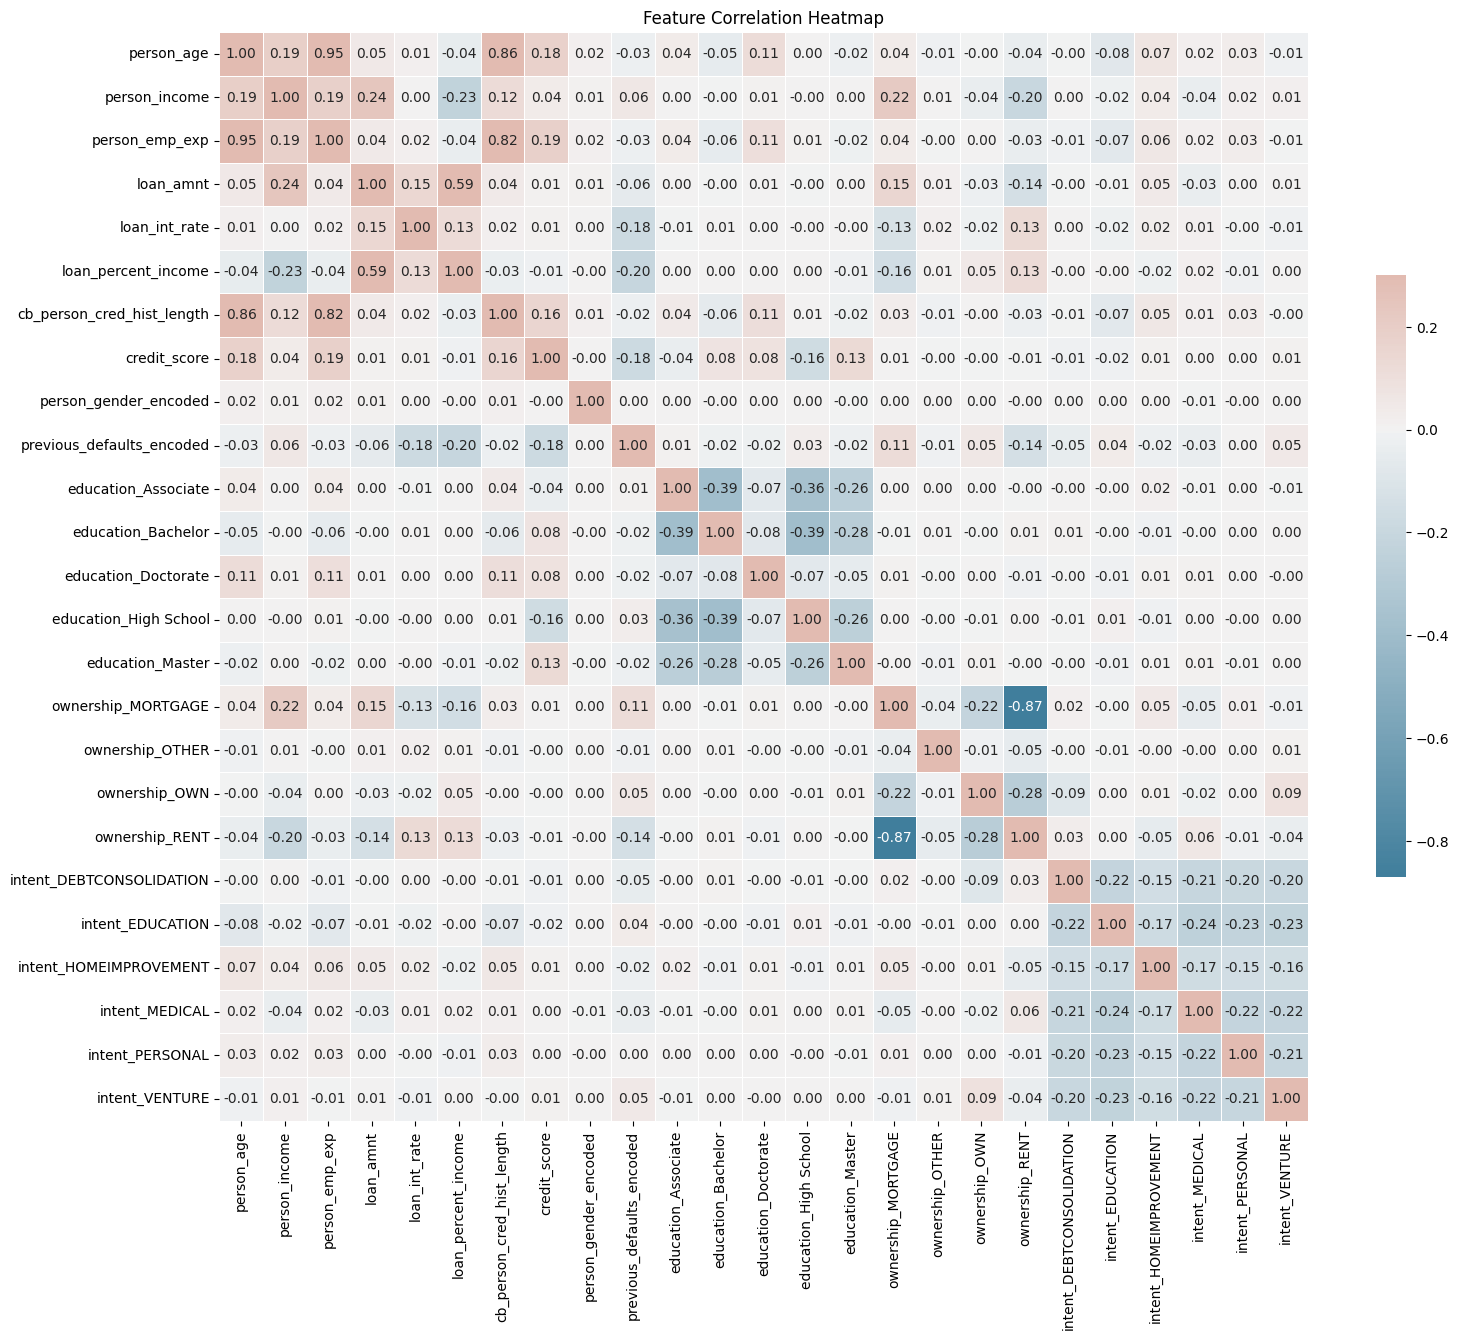

In [144]:
# feature correlation heatmap

plt.figure(figsize=(16, 14))
correlation_matrix = X.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5,
            annot=True, fmt='.2f',
            cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()

## Variance Analysis

In [145]:
# Feature Variance
df.var()

person_age                    3.654333e+01
person_income                 6.467778e+09
person_emp_exp                3.676642e+01
loan_amnt                     3.987779e+07
loan_int_rate                 8.873299e+00
loan_percent_income           7.605987e-03
cb_person_cred_hist_length    1.505209e+01
credit_score                  2.543776e+03
loan_status                   1.728433e-01
person_gender_encoded         2.472992e-01
previous_defaults_encoded     2.499423e-01
education_Associate           1.958499e-01
education_Bachelor            2.091018e-01
education_Doctorate           1.360986e-02
education_High School         1.952691e-01
education_Master              1.310546e-01
ownership_MORTGAGE            2.420606e-01
ownership_OTHER               2.593298e-03
ownership_OWN                 6.127869e-02
ownership_RENT                2.495664e-01
intent_DEBTCONSOLIDATION      1.335704e-01
intent_EDUCATION              1.620320e-01
intent_HOMEIMPROVEMENT        9.499367e-02
intent_MEDI

## 70/30 (Train/Test) Random Split

In [146]:
"""70/30 split for Training and Testing portions of the dataset"""

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 31500 samples
Test set: 13500 samples


## Scaler selection and model fitting

In [147]:
# Create a scaler
scaler = StandardScaler() # Specify your scaler here (e.g. MinmaxScaler, None, etc)

# Identify numerical columns to scale (we don't need to scale already encoded columns)
numerical_columns = [col for col in X_train.columns if col in ['person_age', 'person_income', 'person_emp_exp', 
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                    'cb_person_cred_hist_length', 'credit_score']]

# Fit the scaler to the training data and transform both training and test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Model Training